In [1]:
#https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
import pandas as pd
import numpy as np
import random
import os
from datetime import datetime

#!pip install pypyodbc
#!pip install pyodbc

import pypyodbc
import pyodbc

import statsmodels.api as sm #Modelos estadistico y metodologías econometricas
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller #Pruebas de raíz unitaria ads,kpss,ers
from statsmodels.tsa.seasonal import seasonal_decompose #Análisis de estacionalidad

import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts

import sklearn as sk
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats.distributions import chi2
import seaborn as sns

import warnings
import itertools
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
sql_queryx = pd.DataFrame(np.random.randint(0,250,size=(58, 4)), columns=('Infra','Mant_inf','Maq','Mant_maq'))
sql_queryx['fecha'] = pd.date_range(start='1/1/2006', end='7/1/2020', freq='Q')
sql_queryx

,Infra,Mant_inf,Maq,Mant_maq,fecha
0,119,169,103,114,2006-03-31
1,6,1,80,209,2006-06-30
2,96,80,55,11,2006-09-30
3,142,248,162,111,2006-12-31
4,30,162,115,162,2007-03-31
5,154,33,225,189,2007-06-30
6,218,159,26,123,2007-09-30
7,16,25,196,25,2007-12-31
8,98,95,43,83,2008-03-31
9,60,37,60,187,2008-06-30


In [3]:
#sql_queryx = pd.read_excel (r"")
pd.options.display.float_format = '{:,.0f}'.format
sql_queryx['Infra'] = sql_queryx['Infra'].cumsum().shift(-4)
sql_queryx['Maq'] = sql_queryx['Maq'].cumsum().shift(-4)
sql_queryx.dropna(subset = ['Infra'], inplace=True)
#sql_queryx

### Mantenimiento e Inversión en XXXX - Modelo OLS

In [4]:
X = sql_queryx['Infra']
y = sql_queryx['Mant_inf']
# X = sm.add_constant(X)
result1 = sm.OLS(y, X.astype(float)).fit()
print(result1.summary())

                                 OLS Regression Results                                
Dep. Variable:               Mant_inf   R-squared (uncentered):                   0.697
Model:                            OLS   Adj. R-squared (uncentered):              0.691
Method:                 Least Squares   F-statistic:                              121.9
Date:                Tue, 24 Aug 2021   Prob (F-statistic):                    2.35e-15
Time:                        15:45:55   Log-Likelihood:                         -316.62
No. Observations:                  54   AIC:                                      635.2
Df Residuals:                      53   BIC:                                      637.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

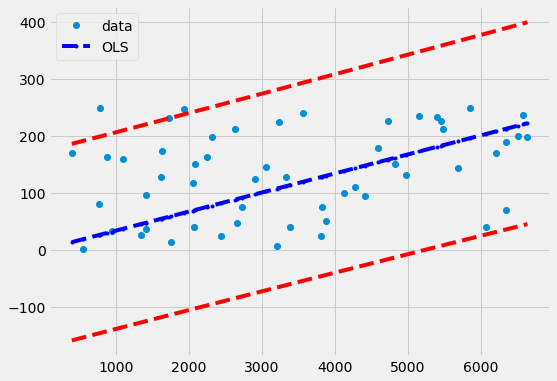

In [5]:
prstd, iv_l, iv_u = wls_prediction_std(result1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, y, 'o', label="data")
#ax.plot(X, result1.predict(), 'y-', label="Predict")
ax.plot(X, result1.fittedvalues, 'b--.', label="OLS")
ax.plot(X, iv_u, 'r--')
ax.plot(X, iv_l, 'r--')
ax.legend(loc='best');

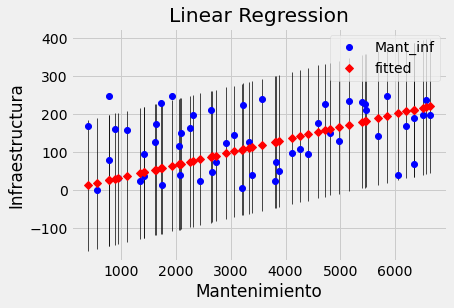

In [6]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(result1, 0, ax=ax)
ax.set_ylabel("Infraestructura")
ax.set_xlabel("Mantenimiento")
ax.set_title("Linear Regression")
plt.show()

### Mantenimiento e Inversión enXXXX - Modelo SARIMAX

##### Estimación en Niveles

In [7]:
model = sm.tsa.statespace.SARIMAX(endog=y, exog =X, order=(0,0,4))
result2 = model.fit()
print(result2.summary());

                               SARIMAX Results                                
Dep. Variable:               Mant_inf   No. Observations:                   54
Model:               SARIMAX(0, 0, 4)   Log Likelihood                -306.583
Date:                Tue, 24 Aug 2021   AIC                            625.165
Time:                        15:45:56   BIC                            637.099
Sample:                             0   HQIC                           629.768
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Infra          0.0339      0.006      5.842      0.000       0.023       0.045
ma.L1         -0.1327      0.186     -0.715      0.475      -0.496       0.231
ma.L2          0.5263      0.248      2.123      0.0

##### Estimación en Tasas de Crecimiento

In [8]:
X = sql_queryx['Infra']

result = sts.adfuller(X)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')

Null Hypothesis(H0): Serie has a unit root
ADF Statistic: 0.657260
p-value: 0.988945
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597
Numbers of lag used         : 0.000000
Numbers of observations used: 53.000000
Criterio de Información     : 478.218092
No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.988945
Por tanto: La serie tiene raíz unitaria, entonces es no estacionaria


In [9]:
y = sql_queryx['Mant_inf']

result = sts.adfuller(y)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')

Null Hypothesis(H0): Serie has a unit root
ADF Statistic: -2.823619
p-value: 0.054978
Critical Values:
	1%: -3.566
	5%: -2.920
	10%: -2.598
Numbers of lag used         : 2.000000
Numbers of observations used: 51.000000
Criterio de Información     : 484.415199
Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.054978
Por tanto: La serie no tiene raíz unitaria, entonces es estacionaria


Ninguna de las series son estacionarias

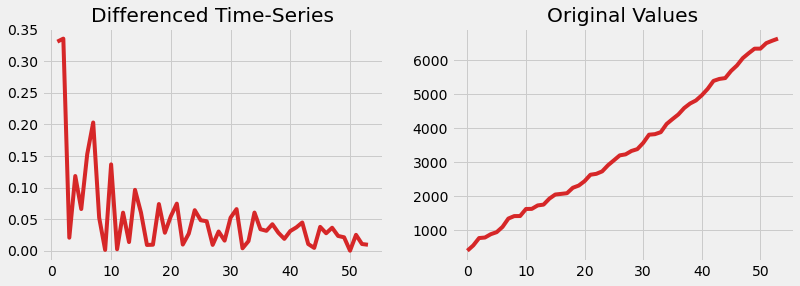

In [10]:

#df_logged_diff_x = sql_queryx['Infra'].pct_change()

df_logged_x = sql_queryx['Infra'].apply(lambda x : np.log(x))

df_logged_diff_x = df_logged_x - df_logged_x.shift()

ax1 = plt.subplot(121)
df_logged_diff_x.plot(figsize=(12,4), color="tab:red", title="Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
sql_queryx['Infra'].plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

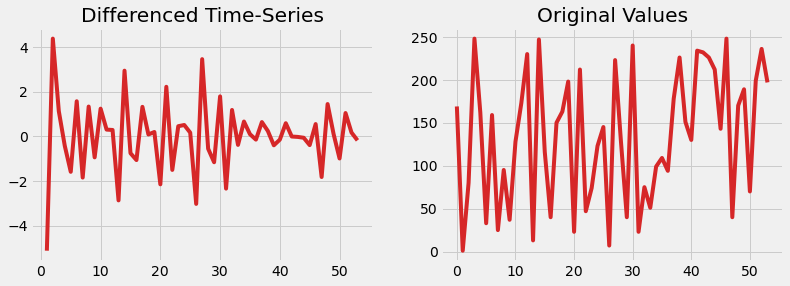

In [11]:
#df_logged_diff = sql_queryx['Mant_inf'].pct_change()

df_logged = sql_queryx['Mant_inf'].apply(lambda x : np.log(x))

df_logged_diff = df_logged - df_logged.shift()

ax1 = plt.subplot(121)
df_logged_diff.plot(figsize=(12,4), color="tab:red", title="Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
sql_queryx['Mant_inf'].plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [12]:
db1=pd.DataFrame(df_logged_diff)
db2 = pd.DataFrame(df_logged_diff_x)
db1 = db1.iloc[1:,]
db2 = db2.iloc[1:,]
db_new=pd.concat([db1,db2], axis=1)
#db_new

In [13]:
X = db_new['Infra']

result = sts.adfuller(X)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria') 

Null Hypothesis(H0): Serie has a unit root
ADF Statistic: -5.980929
p-value: 0.000000
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597
Numbers of lag used         : 0.000000
Numbers of observations used: 52.000000
Criterio de Información     : -191.146798
Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.000000
Por tanto: La serie no tiene raíz unitaria, entonces es estacionaria


In [14]:
y = db_new['Mant_inf']

result = sts.adfuller(y)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria') 

Null Hypothesis(H0): Serie has a unit root
ADF Statistic: -8.737300
p-value: 0.000000
Critical Values:
	1%: -3.568
	5%: -2.921
	10%: -2.599
Numbers of lag used         : 2.000000
Numbers of observations used: 50.000000
Criterio de Información     : 103.798392
Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.000000
Por tanto: La serie no tiene raíz unitaria, entonces es estacionaria


In [15]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(db_new['Mant_inf'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 4)12 - AIC:187.96413417980813
ARIMA(0, 0, 0)x(0, 0, 1, 4)12 - AIC:167.97852630784234


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 0, 0)x(0, 1, 0, 4)12 - AIC:202.51175494445664
ARIMA(0, 0, 0)x(0, 1, 1, 4)12 - AIC:168.81390817661284
ARIMA(0, 0, 0)x(1, 0, 0, 4)12 - AIC:171.1489366615571


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


ARIMA(0, 0, 0)x(1, 0, 1, 4)12 - AIC:158.67019246203594
ARIMA(0, 0, 0)x(1, 1, 0, 4)12 - AIC:181.10843736565033
ARIMA(0, 0, 0)x(1, 1, 1, 4)12 - AIC:169.5089768159825


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 0, 1)x(0, 0, 0, 4)12 - AIC:134.85136947423376
ARIMA(0, 0, 1)x(0, 0, 1, 4)12 - AIC:127.13737065804317
ARIMA(0, 0, 1)x(0, 1, 0, 4)12 - AIC:159.4000981146478


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 0, 1)x(0, 1, 1, 4)12 - AIC:126.5198466942154
ARIMA(0, 0, 1)x(1, 0, 0, 4)12 - AIC:131.59910291514404


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


ARIMA(0, 0, 1)x(1, 0, 1, 4)12 - AIC:126.11274138841472
ARIMA(0, 0, 1)x(1, 1, 0, 4)12 - AIC:142.0103699120821


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


ARIMA(0, 0, 1)x(1, 1, 1, 4)12 - AIC:128.51979139098017
ARIMA(0, 1, 0)x(0, 0, 0, 4)12 - AIC:237.61474017108858
ARIMA(0, 1, 0)x(0, 0, 1, 4)12 - AIC:221.02797590551884
ARIMA(0, 1, 0)x(0, 1, 0, 4)12 - AIC:251.1233527058547
ARIMA(0, 1, 0)x(0, 1, 1, 4)12 - AIC:218.47406379933213


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 1, 0)x(1, 0, 0, 4)12 - AIC:225.5717729382437
ARIMA(0, 1, 0)x(1, 0, 1, 4)12 - AIC:211.28526866034107
ARIMA(0, 1, 0)x(1, 1, 0, 4)12 - AIC:229.88291566920515
ARIMA(0, 1, 0)x(1, 1, 1, 4)12 - AIC:217.8973018251959


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 1, 1)x(0, 0, 0, 4)12 - AIC:185.2821613116049
ARIMA(0, 1, 1)x(0, 0, 1, 4)12 - AIC:164.9973669225667
ARIMA(0, 1, 1)x(0, 1, 0, 4)12 - AIC:196.95358531585026


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 1, 1)x(0, 1, 1, 4)12 - AIC:168.67655085114544
ARIMA(0, 1, 1)x(1, 0, 0, 4)12 - AIC:174.61832683444285


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


ARIMA(0, 1, 1)x(1, 0, 1, 4)12 - AIC:160.86324981676236
ARIMA(0, 1, 1)x(1, 1, 0, 4)12 - AIC:183.96489031964208
ARIMA(0, 1, 1)x(1, 1, 1, 4)12 - AIC:169.28703885168727


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 0, 0)x(0, 0, 0, 4)12 - AIC:165.04982822379364
ARIMA(1, 0, 0)x(0, 0, 1, 4)12 - AIC:141.79038485218055
ARIMA(1, 0, 0)x(0, 1, 0, 4)12 - AIC:186.25181153790498
ARIMA(1, 0, 0)x(0, 1, 1, 4)12 - AIC:144.8945823993978
ARIMA(1, 0, 0)x(1, 0, 0, 4)12 - AIC:141.7532971631898


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 0, 0)x(1, 0, 1, 4)12 - AIC:137.17190186060998
ARIMA(1, 0, 0)x(1, 1, 0, 4)12 - AIC:154.77967320186238


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


ARIMA(1, 0, 0)x(1, 1, 1, 4)12 - AIC:145.60603492240108
ARIMA(1, 0, 1)x(0, 0, 0, 4)12 - AIC:133.76487837398213
ARIMA(1, 0, 1)x(0, 0, 1, 4)12 - AIC:122.43827181949158


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 0, 1)x(0, 1, 0, 4)12 - AIC:160.18787559087443
ARIMA(1, 0, 1)x(0, 1, 1, 4)12 - AIC:122.31807960968904
ARIMA(1, 0, 1)x(1, 0, 0, 4)12 - AIC:124.31721392099209


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 0, 1)x(1, 0, 1, 4)12 - AIC:122.68475069677199
ARIMA(1, 0, 1)x(1, 1, 0, 4)12 - AIC:134.9124942554696


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


ARIMA(1, 0, 1)x(1, 1, 1, 4)12 - AIC:124.31807957506743
ARIMA(1, 1, 0)x(0, 0, 0, 4)12 - AIC:206.9586115649884
ARIMA(1, 1, 0)x(0, 0, 1, 4)12 - AIC:184.71394686174753
ARIMA(1, 1, 0)x(0, 1, 0, 4)12 - AIC:227.86188234615875


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 0)x(0, 1, 1, 4)12 - AIC:183.95560069458236
ARIMA(1, 1, 0)x(1, 0, 0, 4)12 - AIC:184.69606636395946
ARIMA(1, 1, 0)x(1, 0, 1, 4)12 - AIC:178.12851586671587
ARIMA(1, 1, 0)x(1, 1, 0, 4)12 - AIC:195.59982956192994

C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages


ARIMA(1, 1, 0)x(1, 1, 1, 4)12 - AIC:184.78265988474584
ARIMA(1, 1, 1)x(0, 0, 0, 4)12 - AIC:163.29918530717734


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 1)x(0, 0, 1, 4)12 - AIC:142.48198755061634
ARIMA(1, 1, 1)x(0, 1, 0, 4)12 - AIC:182.92734718085222
ARIMA(1, 1, 1)x(0, 1, 1, 4)12 - AIC:147.24329649496772


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 1)x(1, 0, 0, 4)12 - AIC:145.6507081923923
ARIMA(1, 1, 1)x(1, 0, 1, 4)12 - AIC:138.74463688925437
ARIMA(1, 1, 1)x(1, 1, 0, 4)12 - AIC:158.15470163690364


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 1)x(1, 1, 1, 4)12 - AIC:148.24260564402562


In [17]:
warnings.filterwarnings('ignore', message='foo bar')
model = sm.tsa.statespace.SARIMAX(endog=db_new.Mant_inf, exog =db_new.Infra, order=(0,0,1))
results = model.fit()
print(results.summary());

                               SARIMAX Results                                
Dep. Variable:               Mant_inf   No. Observations:                   53
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -76.935
Date:                Tue, 24 Aug 2021   AIC                            159.871
Time:                        15:46:03   BIC                            165.782
Sample:                             0   HQIC                           162.144
                                 - 53                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Infra          0.4823      0.307      1.570      0.116      -0.120       1.085
ma.L1         -0.9999     94.354     -0.011      0.992    -185.930     183.931
sigma2         0.9902     93.421      0.011      0.9

C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


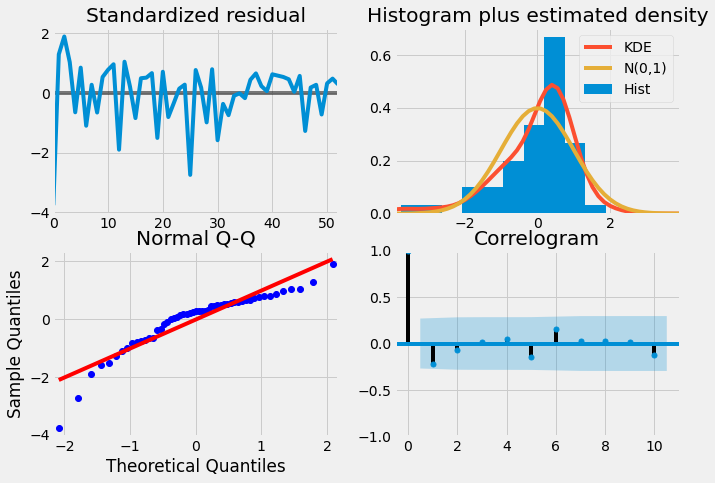

In [18]:
results.plot_diagnostics(figsize=(10, 7))
plt.show()

In [19]:
pred = results.get_prediction(start=0,  dynamic=False)
pred_ci = pred.conf_int()
#pred_ci

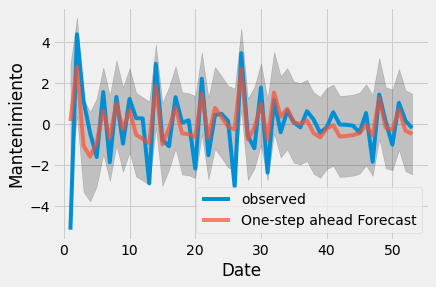

In [20]:
ax = db_new['Mant_inf'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Mantenimiento')
plt.legend()

plt.show()

In [21]:
db_new.Infra[0:8,]

1   0
2   0
3   0
4   0
5   0
6   0
7   0
8   0
Name: Infra, dtype: float64

In [22]:
pred_uc = results.get_forecast(steps=8, exog=db_new.Infra[0:8,])

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


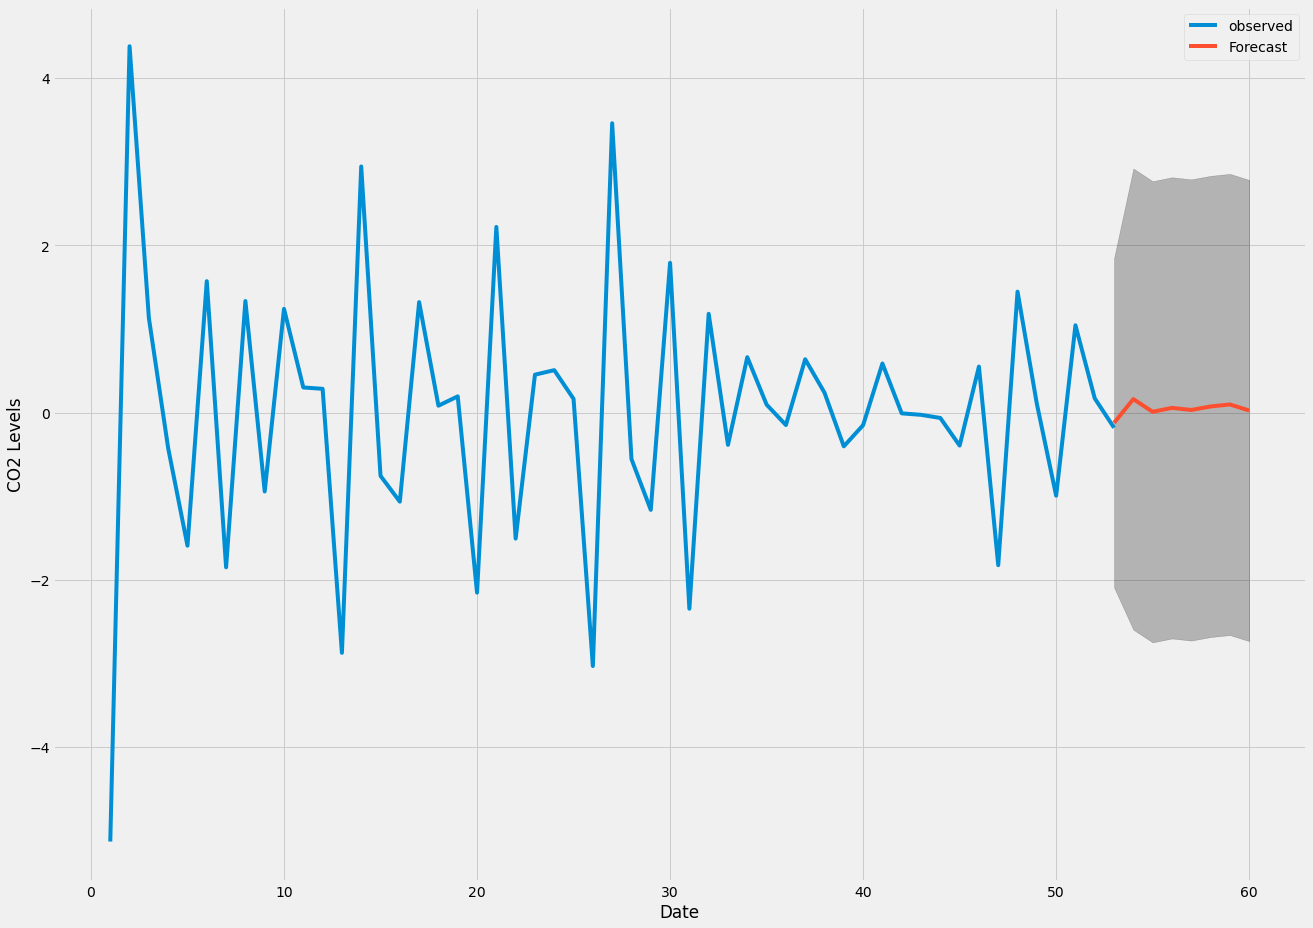

In [23]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [24]:
ti = pred.predicted_mean
db_n = pd.DataFrame(ti, columns = ['mant_rate_hat'])
db_n['FECHA'] = pd.date_range('2007-04-05', periods=53, freq='Q')
db_n['mant_rate'] = y
db_n['infra_rate'] = X
db_n['error'] = y - db_n['mant_rate_hat']
db_n['Mant_inf'] = sql_queryx['Mant_inf']
db_n['Infra'] = sql_queryx['Infra']
db_n

,mant_rate_hat,FECHA,mant_rate,infra_rate,error,Mant_inf,Infra
1,0,2007-06-30,-5,0,-5,1,547
2,3,2007-09-30,4,0,2,80,765
3,-1,2007-12-31,1,0,2,248,781
4,-2,2008-03-31,-0,0,1,162,879
5,-1,2008-06-30,-2,0,-1,33,939
6,1,2008-09-30,2,0,1,159,"1,094"
7,-1,2008-12-31,-2,0,-1,25,"1,340"
8,1,2009-03-31,1,0,0,95,"1,412"
9,-0,2009-06-30,-1,0,-1,37,"1,414"
10,1,2009-09-30,1,0,1,128,"1,621"


In [25]:
forecast= pred_uc.predicted_mean
db1 = pd.DataFrame(forecast, columns = ['mant_rate_hat'])
db1['FECHA']= pd.date_range('2020-07-01', periods=8, freq='Q')
db1

,mant_rate_hat,FECHA
53,-0,2020-09-30
54,0,2020-12-31
55,0,2021-03-31
56,0,2021-06-30
57,0,2021-09-30
58,0,2021-12-31
59,0,2022-03-31
60,0,2022-06-30


In [26]:
mantenimiento_infra = pd.concat([db_n, db1], axis=0)
mantenimiento_infra

,mant_rate_hat,FECHA,mant_rate,infra_rate,error,Mant_inf,Infra
1,0,2007-06-30,-5,0,-5,1,547
2,3,2007-09-30,4,0,2,80,765
3,-1,2007-12-31,1,0,2,248,781
4,-2,2008-03-31,-0,0,1,162,879
5,-1,2008-06-30,-2,0,-1,33,939
...,...,...,...,...,...,...,...
56,0,2021-06-30,nan,nan,nan,nan,nan
57,0,2021-09-30,nan,nan,nan,nan,nan
58,0,2021-12-31,nan,nan,nan,nan,nan
59,0,2022-03-31,nan,nan,nan,nan,nan


### Mantenimiento e Inversión en XXXX - Modelo OLS

In [28]:
X = sql_queryx['Maq']
y = sql_queryx['Mant_maq']
# X = sm.add_constant(X)
res1 = sm.OLS(y, X.astype(float)).fit()
print(res1.summary())

                                 OLS Regression Results                                
Dep. Variable:               Mant_maq   R-squared (uncentered):                   0.611
Model:                            OLS   Adj. R-squared (uncentered):              0.604
Method:                 Least Squares   F-statistic:                              83.28
Date:                Tue, 24 Aug 2021   Prob (F-statistic):                    1.86e-12
Time:                        15:46:04   Log-Likelihood:                         -321.55
No. Observations:                  54   AIC:                                      645.1
Df Residuals:                      53   BIC:                                      647.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

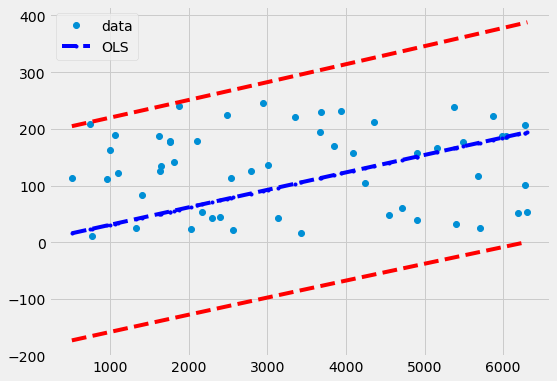

In [29]:
prstd, iv_l, iv_u = wls_prediction_std(res1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, y, 'o', label="data")
#ax.plot(X, result1.predict(), 'y-', label="Predict")
ax.plot(X, res1.fittedvalues, 'b--.', label="OLS")
ax.plot(X, iv_u, 'r--')
ax.plot(X, iv_l, 'r--')
ax.legend(loc='best');

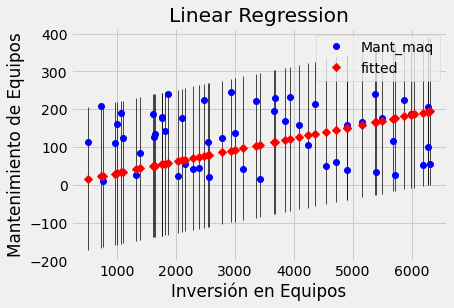

In [30]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(res1, 0, ax=ax)
ax.set_ylabel("Mantenimiento de Equipos")
ax.set_xlabel("Inversión en Equipos")
ax.set_title("Linear Regression")
plt.show()

### Mantenimiento e Inversión en XXXX - Modelo SARIMAX

##### Estimación en Niveles

In [31]:
model = sm.tsa.statespace.SARIMAX(endog=y, exog =X, order=(0,0,4))
res3 = model.fit()
print(res3.summary());

                               SARIMAX Results                                
Dep. Variable:               Mant_maq   No. Observations:                   54
Model:               SARIMAX(0, 0, 4)   Log Likelihood                -314.624
Date:                Tue, 24 Aug 2021   AIC                            641.248
Time:                        15:46:05   BIC                            653.182
Sample:                             0   HQIC                           645.851
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Maq            0.0286      0.007      4.110      0.000       0.015       0.042
ma.L1          0.0751      0.223      0.336      0.737      -0.362       0.512
ma.L2          0.1212      0.203      0.597      0.5

C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


##### Estimación en Tasa de Crecimiento

In [32]:
X = sql_queryx['Maq']

result = sts.adfuller(X)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria') 

Null Hypothesis(H0): Serie has a unit root
ADF Statistic: 0.218658
p-value: 0.973289
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597
Numbers of lag used         : 0.000000
Numbers of observations used: 53.000000
Criterio de Información     : 480.813042
No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.973289
Por tanto: La serie tiene raíz unitaria, entonces es no estacionaria


In [33]:
y = sql_queryx['Mant_maq']

result = sts.adfuller(y)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria') 


Null Hypothesis(H0): Serie has a unit root
ADF Statistic: -8.710857
p-value: 0.000000
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597
Numbers of lag used         : 0.000000
Numbers of observations used: 53.000000
Criterio de Información     : 484.159990
Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.000000
Por tanto: La serie no tiene raíz unitaria, entonces es estacionaria


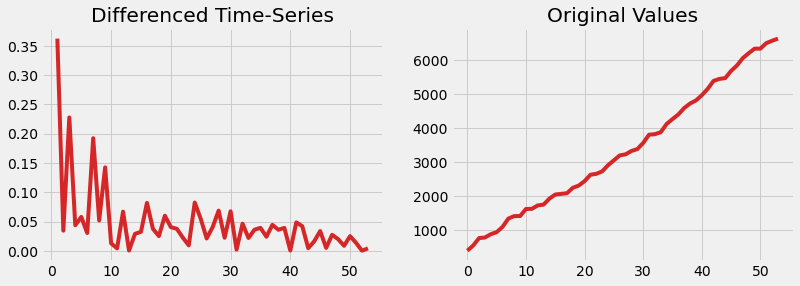

In [34]:
df_logged_x = sql_queryx['Maq'].apply(lambda x : np.log(x))

df_logged_diff_x = df_logged_x - df_logged_x.shift()

ax1 = plt.subplot(121)
df_logged_diff_x.plot(figsize=(12,4), color="tab:red", title="Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
sql_queryx['Infra'].plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

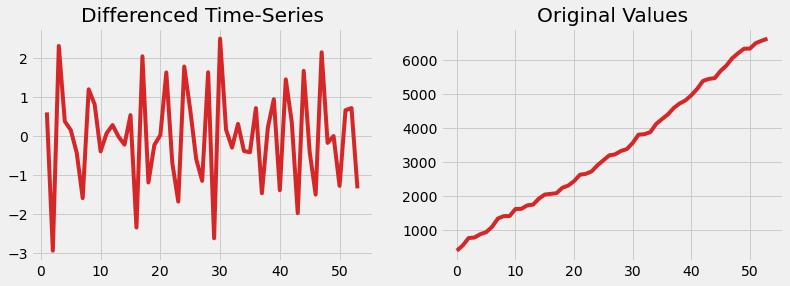

In [35]:
df_logged = sql_queryx['Mant_maq'].apply(lambda x : np.log(x))

df_logged_diff = df_logged- df_logged.shift()

ax1 = plt.subplot(121)
df_logged_diff.plot(figsize=(12,4), color="tab:red", title="Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
sql_queryx['Infra'].plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [36]:
df1=pd.DataFrame(df_logged_diff)
df2 = pd.DataFrame(df_logged_diff_x)
df1 = df1.iloc[1:,]
df2 = df2.iloc[1:,]
db_new1=pd.concat([df1,df2], axis=1)
#db_new1

In [37]:
# ADF Test
X = db_new1['Maq']

result = sts.adfuller(X)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria') 

Null Hypothesis(H0): Serie has a unit root
ADF Statistic: -5.101439
p-value: 0.000014
Critical Values:
	1%: -3.589
	5%: -2.930
	10%: -2.603
Numbers of lag used         : 8.000000
Numbers of observations used: 44.000000
Criterio de Información     : -202.478381
Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.000014
Por tanto: La serie no tiene raíz unitaria, entonces es estacionaria


In [38]:
# ADF Test
y = db_new1['Mant_maq']

result = sts.adfuller(y)
print('Null Hypothesis(H0): Serie has a unit root')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Numbers of lag used         : %f' % result[2])
print('Numbers of observations used: %f' % result[3])
print('Criterio de Información     : %f' % result[5])

ADF=result[0]
Critical=result[4].get('10%')
if ADF<Critical:
    print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria')
elif Critical<ADF:
    print('No se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie tiene raíz unitaria, entonces es no estacionaria')
else: print('Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería %f' % result[1]+'\nPor tanto: La serie no tiene raíz unitaria, entonces es estacionaria') 

Null Hypothesis(H0): Serie has a unit root
ADF Statistic: -7.341483
p-value: 0.000000
Critical Values:
	1%: -3.568
	5%: -2.921
	10%: -2.599
Numbers of lag used         : 2.000000
Numbers of observations used: 50.000000
Criterio de Información     : 111.320893
Se rechaza H0, de rechazar H0 la probabilidad de equivocarnos sería 0.000000
Por tanto: La serie no tiene raíz unitaria, entonces es estacionaria


In [39]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(db_new1['Mant_maq'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 4)12 - AIC:174.75832846996323
ARIMA(0, 0, 0)x(0, 0, 1, 4)12 - AIC:158.1269038371235
ARIMA(0, 0, 0)x(0, 1, 0, 4)12 - AIC:197.62767196445157


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 0, 0)x(0, 1, 1, 4)12 - AIC:155.6930931024824
ARIMA(0, 0, 0)x(1, 0, 0, 4)12 - AIC:160.21264337140195
ARIMA(0, 0, 0)x(1, 0, 1, 4)12 - AIC:159.95199626269866
ARIMA(0, 0, 0)x(1, 1, 0, 4)12 - AIC:166.73465745969156


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 0, 0)x(1, 1, 1, 4)12 - AIC:157.7667255377341
ARIMA(0, 0, 1)x(0, 0, 0, 4)12 - AIC:132.81255244198573
ARIMA(0, 0, 1)x(0, 0, 1, 4)12 - AIC:120.19504955947302
ARIMA(0, 0, 1)x(0, 1, 0, 4)12 - AIC:155.27770065443508


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 0, 1)x(0, 1, 1, 4)12 - AIC:121.86675072911262
ARIMA(0, 0, 1)x(1, 0, 0, 4)12 - AIC:123.82210483291088
ARIMA(0, 0, 1)x(1, 0, 1, 4)12 - AIC:122.05445653919462


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 0, 1)x(1, 1, 0, 4)12 - AIC:135.1835215767177
ARIMA(0, 0, 1)x(1, 1, 1, 4)12 - AIC:124.38428405968254
ARIMA(0, 1, 0)x(0, 0, 0, 4)12 - AIC:226.25715074434987


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 1, 0)x(0, 0, 1, 4)12 - AIC:207.4634448773371
ARIMA(0, 1, 0)x(0, 1, 0, 4)12 - AIC:247.09472469935983
ARIMA(0, 1, 0)x(0, 1, 1, 4)12 - AIC:200.4584147088771
ARIMA(0, 1, 0)x(1, 0, 0, 4)12 - AIC:210.51880174673204


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 1, 0)x(1, 0, 1, 4)12 - AIC:208.41654553620205
ARIMA(0, 1, 0)x(1, 1, 0, 4)12 - AIC:212.9982906606189
ARIMA(0, 1, 0)x(1, 1, 1, 4)12 - AIC:202.98069502410442
ARIMA(0, 1, 1)x(0, 0, 0, 4)12 - AIC:166.37250537297746


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 1, 1)x(0, 0, 1, 4)12 - AIC:158.51966017197003
ARIMA(0, 1, 1)x(0, 1, 0, 4)12 - AIC:190.1460011875613


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


ARIMA(0, 1, 1)x(0, 1, 1, 4)12 - AIC:156.66600809723147
ARIMA(0, 1, 1)x(1, 0, 0, 4)12 - AIC:163.8902864834892
ARIMA(0, 1, 1)x(1, 0, 1, 4)12 - AIC:160.47969717651688


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(0, 1, 1)x(1, 1, 0, 4)12 - AIC:169.91116031345743
ARIMA(0, 1, 1)x(1, 1, 1, 4)12 - AIC:159.75892502357829
ARIMA(1, 0, 0)x(0, 0, 0, 4)12 - AIC:160.0364650345354
ARIMA(1, 0, 0)x(0, 0, 1, 4)12 - AIC:144.99546358005193
ARIMA(1, 0, 0)x(0, 1, 0, 4)12 - AIC:181.26879612509015


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 0, 0)x(0, 1, 1, 4)12 - AIC:142.94850710299053
ARIMA(1, 0, 0)x(1, 0, 0, 4)12 - AIC:145.09215588881005
ARIMA(1, 0, 0)x(1, 0, 1, 4)12 - AIC:146.91703795454814
ARIMA(1, 0, 0)x(1, 1, 0, 4)12 - AIC:151.45571099492594
ARIMA(1, 0, 0)x(1, 1, 1, 4)12 - AIC:144.9918485769487


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 0, 1)x(0, 0, 0, 4)12 - AIC:132.29536102686393
ARIMA(1, 0, 1)x(0, 0, 1, 4)12 - AIC:119.98990675348348
ARIMA(1, 0, 1)x(0, 1, 0, 4)12 - AIC:155.4624530506542
ARIMA(1, 0, 1)x(0, 1, 1, 4)12 - AIC:121.78608513115849


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 0, 1)x(1, 0, 0, 4)12 - AIC:122.22974945922769
ARIMA(1, 0, 1)x(1, 0, 1, 4)12 - AIC:121.96518311527863
ARIMA(1, 0, 1)x(1, 1, 0, 4)12 - AIC:133.54038740788081
ARIMA(1, 0, 1)x(1, 1, 1, 4)12 - AIC:124.63881230663868
ARIMA(1, 1, 0)x(0, 0, 0, 4)12 - AIC:200.16474554260736
ARIMA(1, 1, 0)x(0, 0, 1, 4)12 - AIC:185.4226313216754
ARIMA(1, 1, 0)x(0, 1, 0, 4)12 - AIC:222.33107570307268
ARIMA(1, 1, 0)x(0, 1, 1, 4)12 - AIC:177.9901898667582


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 0)x(1, 0, 0, 4)12 - AIC:185.2020722879762
ARIMA(1, 1, 0)x(1, 0, 1, 4)12 - AIC:187.14727940748324
ARIMA(1, 1, 0)x(1, 1, 0, 4)12 - AIC:187.47411437693856


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 0)x(1, 1, 1, 4)12 - AIC:181.36657484575994
ARIMA(1, 1, 1)x(0, 0, 0, 4)12 - AIC:155.91532710841543
ARIMA(1, 1, 1)x(0, 0, 1, 4)12 - AIC:145.42754303690484
ARIMA(1, 1, 1)x(0, 1, 0, 4)12 - AIC:176.0427802609006


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 1)x(0, 1, 1, 4)12 - AIC:144.1981198902545
ARIMA(1, 1, 1)x(1, 0, 0, 4)12 - AIC:149.02214579887558
ARIMA(1, 1, 1)x(1, 0, 1, 4)12 - AIC:146.79599444066218
ARIMA(1, 1, 1)x(1, 1, 0, 4)12 - AIC:154.9095485886084


C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages

ARIMA(1, 1, 1)x(1, 1, 1, 4)12 - AIC:147.57302007967206


In [40]:
model = sm.tsa.statespace.SARIMAX(endog=db_new1.Mant_maq, exog =db_new1.Maq, order=(0,0,1))
results2 = model.fit()
print(results2.summary());

                               SARIMAX Results                                
Dep. Variable:               Mant_maq   No. Observations:                   53
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -66.173
Date:                Tue, 24 Aug 2021   AIC                            138.345
Time:                        15:46:10   BIC                            144.256
Sample:                             0   HQIC                           140.618
                                 - 53                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Maq            0.0707      0.223      0.317      0.751      -0.367       0.508
ma.L1         -0.9999    138.866     -0.007      0.994    -273.171     271.171
sigma2         0.6597     91.577      0.007      0.9

C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Leonela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


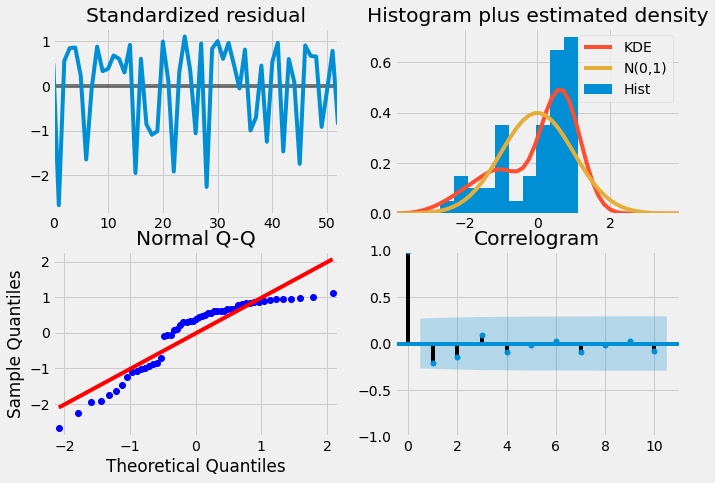

In [41]:
results2.plot_diagnostics(figsize=(10, 7))
plt.show()

In [42]:
pred = results2.get_prediction(start=0,  dynamic=False)
pred_ci = pred.conf_int()
#pred_ci


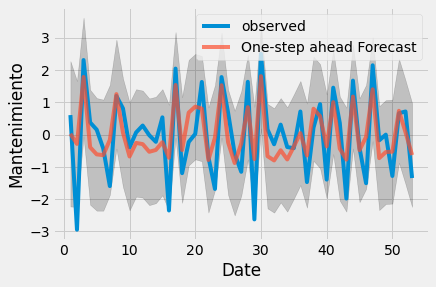

In [43]:
ax = db_new1['Mant_maq'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Mantenimiento')
plt.legend()

plt.show()

In [44]:
db_new1['mant_rate'] = db_new1['Mant_maq']
db_new1['mant_rate_hat']= pred.predicted_mean
db_new1['maq_rate'] = db_new1['Maq']
db_new1['error'] = db_new1['Mant_maq'] - db_new1['mant_rate_hat']
db_new1['Mant_maq'] = sql_queryx['Mant_maq']
db_new1['Maq'] = sql_queryx['Maq']
db_new1

,Mant_maq,Maq,mant_rate,mant_rate_hat,maq_rate,error
1,209,740,1,0,0,1
2,11,766,-3,-0,0,-3
3,111,962,2,2,0,1
4,162,"1,005",0,-0,0,1
5,189,"1,065",0,-1,0,1
6,123,"1,098",-0,-1,0,0
7,25,"1,331",-2,-0,0,-1
8,83,"1,402",1,1,0,-0
9,187,"1,617",1,0,0,1
10,126,"1,638",-0,-1,0,0
